

# Project: TMDb Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this project, user reviews and box office data for more than 10,000 films from The Movie Database (TMDb) will be analyzed. We would also be pulling pertinent data from this dataset. We will also be using the data set to draw inferences. We would concentrate on obtaining relevant information, such as the most popular movies. We will be gathering data and investigating fields like spending, popularity, release date, etc.


### Question(s) for Analysis
>1. What is the most popular movie?

>2. What movie had the largest budget? Did the movie with the largest budget return the highest revenue?

>3. What movie made the highest gross profit?

>4. What movie ran into the biggest loss?

>5. What findings can you draw from the number of movies produced per year from 2000 - 2016?

>6. How has the revenue changed over the years from 2000 till 2016?

>7. What is the relationship between budget and revenue?



In [1]:
# import statements for all of the packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Load your data and print out a few lines. 
df_movies = pd.read_csv('tmdb_5000_movies.csv')
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
#get the shape of the data ie.the number of columnns and rows
df_movies.shape

(4803, 20)

In [5]:
#get the numerical decription of the data
df_movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


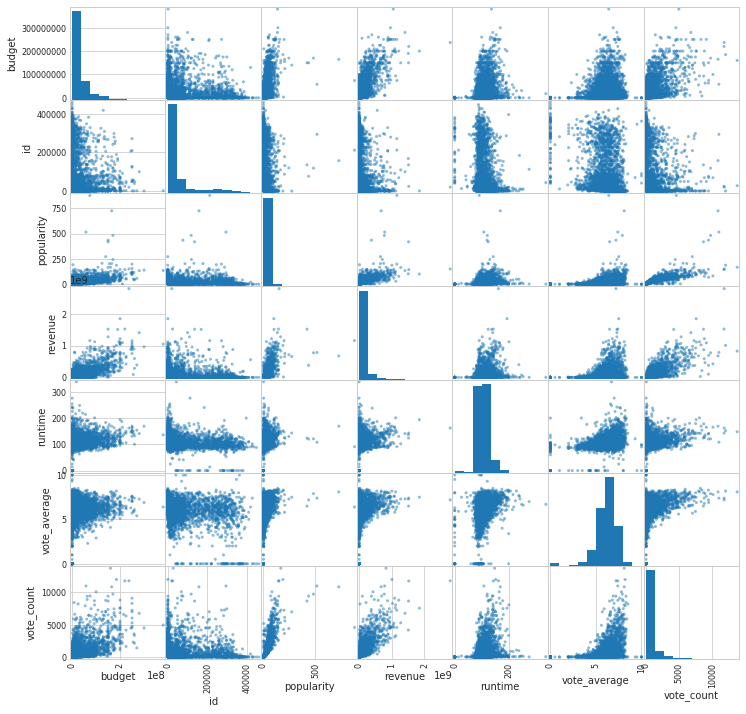

In [6]:
# To check the relationship between columns in our dataset using scatter matrix
pd.plotting.scatter_matrix(df_movies,figsize=(12,12));

Observation

1. Vote count and popularity have a positive correlation
2. Budget and revenue have a positive correlation

### Data Cleaning

In order to prepare my data for analysis, I'll clean my data following thesse steps:
 

 2. Check for and drop the null values
 2. Check for and drop duplicates
 3. Check the data types and convert them where necesary

In [7]:
#check for null values
df_movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [8]:
#Drop columns with null values so our data set can be free of null values
df_movies = df_movies.drop(['homepage', 'tagline'], axis=1)
df_movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124


In [9]:
#check for duplicate values
df_movies.duplicated().sum()

0

In [10]:
#check for null values 
df_movies.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [11]:
#since these null values aren't alot we drop the rows that contain these null values so the dataset can be 100% clean
df_movies.dropna(inplace=True)
df_movies.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [12]:
#check the datatypes  all of variables in the dataframe
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4802
Data columns (total 18 columns):
budget                  4799 non-null int64
genres                  4799 non-null object
id                      4799 non-null int64
keywords                4799 non-null object
original_language       4799 non-null object
original_title          4799 non-null object
overview                4799 non-null object
popularity              4799 non-null float64
production_companies    4799 non-null object
production_countries    4799 non-null object
release_date            4799 non-null object
revenue                 4799 non-null int64
runtime                 4799 non-null float64
spoken_languages        4799 non-null object
status                  4799 non-null object
title                   4799 non-null object
vote_average            4799 non-null float64
vote_count              4799 non-null int64
dtypes: float64(3), int64(4), object(11)
memory usage: 712.4+ KB


In [13]:
# Convert release date column to date field
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'],format='%Y-%m-%d')

<a id='eda'></a>
## Exploratory Data Analysis


### 1. What is the most popular movie?

In [14]:
# To get the highest value in the popularity column
df_movies['popularity'].max()

875.581305

In [15]:
# To get the title of the movie with highest popularity 
most_popular_movie = df_movies[df_movies['popularity'] == 875.581305]
most_popular_movie.title

546    Minions
Name: title, dtype: object

### 2. What movie had the largest budget and did this movie return the highest revenue?

In [16]:
# To get the highest value in the budget column
df_movies['budget'].max()

380000000

In [17]:
# To get the title of the movie with largest budget
movie_with_largest_budget = df_movies[df_movies['budget'] == 380000000]
movie_with_largest_budget['title']

17    Pirates of the Caribbean: On Stranger Tides
Name: title, dtype: object

In [18]:
# To get the highest value in the revenue column
df_movies['revenue'].max()

2787965087

In [19]:
# To get the title of the top 5 movies with highest revenue
df_highest_revenue =  df_movies.sort_values(by=['revenue'], ascending=False)
df_highest_revenue['title'].head()

0             Avatar
25           Titanic
16      The Avengers
28    Jurassic World
44         Furious 7
Name: title, dtype: object

### 3.  What movie made the highest gross profit?

In [20]:
#To get gross profit, we subtract budget from revenue

def gross(revenue, budget):
     return revenue - budget

df_movies['gross_profit'] = df_movies.apply(lambda df_movies: gross(df_movies['revenue'], df_movies['budget']), axis=1)
df_movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,gross_profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,2550965087
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,661000000
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,635674609
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,834939099
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,24139100


In [21]:
# To get the highest value in the gross profit column
df_movies['gross_profit'].max()

2550965087

In [22]:
# To get the title of the top 5 movies with gross profit and get the topmost values 
# to know the movie with highest profit
df_highest_gross =  df_movies.sort_values(by=['gross_profit'], ascending=False)
df_highest_gross['title'].head()

0             Avatar
25           Titanic
28    Jurassic World
44         Furious 7
16      The Avengers
Name: title, dtype: object

### 4. What movie ran into the biggest loss?

In [23]:
# To get the bottom values 
# to know the movie with most loss
df_highest_gross['title'].tail(1)

13    The Lone Ranger
Name: title, dtype: object

### 5. What findings  can you draw from the number of movies produced per year from 2000 -  2016?

In [24]:
# create a year cloumn from release date column
df_movies['year'] = pd.DatetimeIndex(df_movies['release_date']).year

In [25]:
# To streamline our data to only contain movies produced  from 2000 - 2016
df_year = df_movies.query('2014 >= year >= 2000')

In [26]:
# To count the number of movies produced per each year
df_year = df_year.groupby('year')['id'].count()

In [27]:
#  To convert the series object into a dataframe
df_year = df_year.to_frame()

In [28]:
#  To generate new dataframe index
df_year = df_year.reset_index()

In [29]:
#  To rename the id colum only in this dataset to count(for numner of movies produced yearly)
df_year.rename({'id':'count'}, axis=1, inplace=True)
df_year

,year,count
0,2000,166
1,2001,183
2,2002,203
3,2003,169
4,2004,204
5,2005,217
6,2006,237
7,2007,195
8,2008,227
9,2009,247


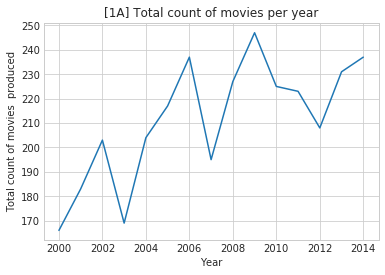

In [30]:
# Plot the graph of year against count to generate conclusions

x = df_year['year']
y = df_year['count']

plt.plot(x, y)
plt.title('[1A] Total count of movies per year')
plt.xlabel('Year')
plt.ylabel('Total count of movies  produced');

The graph above shows that the number of movies has increased between 2000 and 2016.

### 6. How has the revenue changed over the years from 2000 till 2016?

In [31]:
# To streamline our data to only contain movies in dataset from 2000 - 2016
df_new = df_movies.query('2017 > year >= 2000')

In [32]:
# To get the average(mean) revenue for each year
df_new = df_new.groupby('year')['revenue'].mean()

In [33]:
# To get the top 5 records from our dataset
df_new.head()

year
2000    6.597722e+07
2001    7.251295e+07
2002    7.196974e+07
2003    8.410248e+07
2004    7.979748e+07
Name: revenue, dtype: float64

In [34]:
#  To convert the series object into a dataframe
df_new = df_new.to_frame()

In [35]:
# To generate new dataframe index
df_new = df_new.reset_index()

In [36]:
# To see the data in dataset
df_new

,year,revenue
0,2000,6.597722e+07
1,2001,7.251295e+07
2,2002,7.196974e+07
3,2003,8.410248e+07
4,2004,7.979748e+07
5,2005,6.880917e+07
6,2006,7.019364e+07
7,2007,8.457242e+07
8,2008,7.994044e+07
9,2009,8.531438e+07


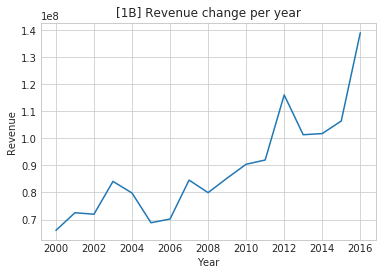

In [37]:
# Plot the graph of year against revenue to generate conclusions
x = df_new['year']
y = df_new['revenue']

plt.plot(x, y)
plt.title('[1B] Revenue change per year')
plt.xlabel('Year')
plt.ylabel('Revenue');

From the graph, it shows that revenue has increased over the years

### 7. What is the relationship between budget and revenue?

73.07642428927228


Text(0,0.5,'Revenue')

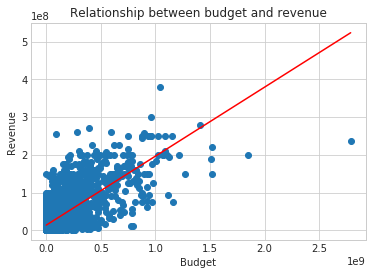

In [38]:
rev = df_movies['revenue']
bud = df_movies['budget']

movie_correlation = rev.corr(bud)
print(movie_correlation * 100)

plt.title('Relationship between budget and revenue')
plt.scatter(rev,bud)

# This will fit the best line into the graph
plt.plot(np.unique(rev), np.poly1d(np.polyfit(rev, bud, 1))
         (np.unique(rev)), color='red')
# labelling axes
plt.xlabel('Budget')
plt.ylabel('Revenue')

Budget and revenue are positively correlated in this instance by 73.1%, as seen on the graph.

<a id='conclusions'></a>
## Conclusions

>  Our dataset's most popular movie is "Minions," with a popularity score of 875.581305.

>  The movie with the largest budget is 'Pirates of the Caribbean: On Stranger Tides'.

>  With a gross profit of nearly 2.5 billion dollars, or about 2,550,965,087, the "Avatar" movie had the highest revenue.

>  The movie 'The Lone Ranger' had the highest loss; it was produced with a budget of 255,000,000 and generated a revenue of 89,289,910, resulting in a loss of over 165 million.

>  From the graph '[1A] Total count of movies per year', we notice obvious up and down fluctuations in the total number of movies produced each year. From 2000 to 2006, the number of movies produced increased until 2002, when it decreased rapidly in 2003, increased again in 2004, and continued to increase until 2009, when it decreased again. It continued to fluctuate until 2015, when the number of movies increased dramatically.
Overall, we can conclude that, despite fluctuations in the total number of movies produced per year, the number of movies produced increased over the 16-year period. .

>  From the graph '[1B] Revenue change per year', it shows a trend that we can see. Even with the fluctuations in the film industry's earnings, one thing can be seen: the sector is still profitable. Even with a sharp decline in income from 2012 to 2013, we can see that after 2013, the revenue of the film industry climbed admirably. The revenue never returned to its original or beginning value. We can therefore assume that the amount of money earned by the film industry has increased over time..

> It is safe to say that since the number of movies and the revenue has risen excellently over the 16 year span, the film indsustry has grown not just in the amount of movies produced but also in revenue, putting a lot of money in the pockets of a lot of producers and filming team as a whole.

## Limitations

>1. There were a lot of null values in the homepage and tagline columns. This influenced my analysis because I had to remove both columns from my dataset. 

>2. It was challenging to develop an analysis based on the vote count column because it was unclear how the vote count was produced.

## References

* www.stackoverflow.com
* www.w3resource.com
* www.geeksforgeeks.org
* www.youtube.com

## Submitting your Project 



In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0